In [1]:
"""
<이미지 데이터를 이용하여 군집분석 수행>
 - 이미지 분류
 - 이미지는 3차원(너비, 높이, 채널)의 3개 값을 가지는 데이터로 되어있음
 - 채널은 색상을 의미하며, 흑백은 1, 컬러는 3의 값을 가짐
 - 색상은 RGB의 색상으로, 각 RGB 색상은 0~255의 값으로 구성되어 있음
"""

'\n<이미지 데이터를 이용하여 군집분석 수행>\n - 이미지 분류\n - 이미지는 3차원(너비, 높이, 채널)의 3개 값을 가지는 데이터로 되어있음\n - 채널은 색상을 의미하며, 흑백은 1, 컬러는 3의 값을 가짐\n - 색상은 RGB의 색상으로, 각 RGB 색상은 0~255의 값으로 구성되어 있음\n'

In [2]:
"""
1. 사용하는 데이터
 - 너비, 높이, 채널이 포함된 이미지 3차원 데이터
 - 과일종류 3가지(사과, 바나나, 파인애플)에 대한 데이터로 구성됨
 
2. 이미지 전처리 방법
 - 3차원 이미지 데이터를 -> 2차원 이미지 데이터로 변환해야 함
 
3. 사용 모델
 - KMeans 모델 사용
"""

'\n1. 사용하는 데이터\n - 너비, 높이, 채널이 포함된 이미지 3차원 데이터\n - 과일종류 3가지(사과, 바나나, 파인애플)에 대한 데이터로 구성됨\n \n2. 이미지 전처리 방법\n - 3차원 이미지 데이터를 -> 2차원 이미지 데이터로 변환해야 함\n \n3. 사용 모델\n - KMeans 모델 사용\n'

### 라이브러리 정의

In [3]:
import numpy as np
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

### 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

### numpy 데이터 읽어들이기

In [4]:
### 사용 데이터: 과일(사과, 바나나, 파인애플) 데이터
# - 각각 100개씩의 데이터로 구성되어 있음

### load(): numpy로 정의된 데이터 읽어들이는 함수
fruits = np.load("./data/09_fruits_300.npy")

print(fruits.shape)
fruits[0][0]

### 읽어 들인 데이터의 차원: 3차원
# (300, 100, 100) = (축, 행, 열) = (축, 높이, 너비) = (행, 높이, 너비)
# - 데이터는 마지막 리스트에만 포함되어 있음
# - 1개 행(축)에는 100행/100열(100높이/100너비)의 데이터가 포함되어 있음
# - 해당 데이터는 흑백 데이터로 마지막 채널값이 생략되어 있음
# - 이미지 1개 데이터 형태 = (높이, 너비, 채널)
# - 여러 이미지 데이터인 경우 형태 = (행, 높이, 너비, 채널)
# - 흑백은 1의 값으로 생략 가능

(300, 100, 100)


array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

In [5]:
### 독립변수 데이터
# - 독립변수는 2차원 데이터만 사용가능함
# - 이미지 데이터를 2차원으로 변경
# - 높이와 너비의 행/열 => 높이 x 너비의 1차원으로 변경
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

### KMeans 군집모델 사용

In [6]:
### 중심점 변경횟수: 5회
# - 군집의 갯수: 3군집
# - KMeans 모델 변수명: km 사용
# - 훈련 및 예측까지 동시에 수행
km = KMeans(n_clusters=3, n_init=5, random_state=42)
km.fit_predict(fruits_2d)


array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
### 예측결과 추출
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
### 군집별로 갯수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))

### 각 군집별로 이미지 데이터를 이미지로 그리기

In [9]:
"""
 - 훈련에 사용되는 데이터: 2차원
 - 이미지로 그리기 위한 데이터: 원본 차원(너비, 높이가 나눠져 있어야 함), 원본 사용
"""

'\n - 훈련에 사용되는 데이터: 2차원\n - 이미지로 그리기 위한 데이터: 원본 차원(너비, 높이가 나눠져 있어야 함), 원본 사용\n'

(91, 100, 100)


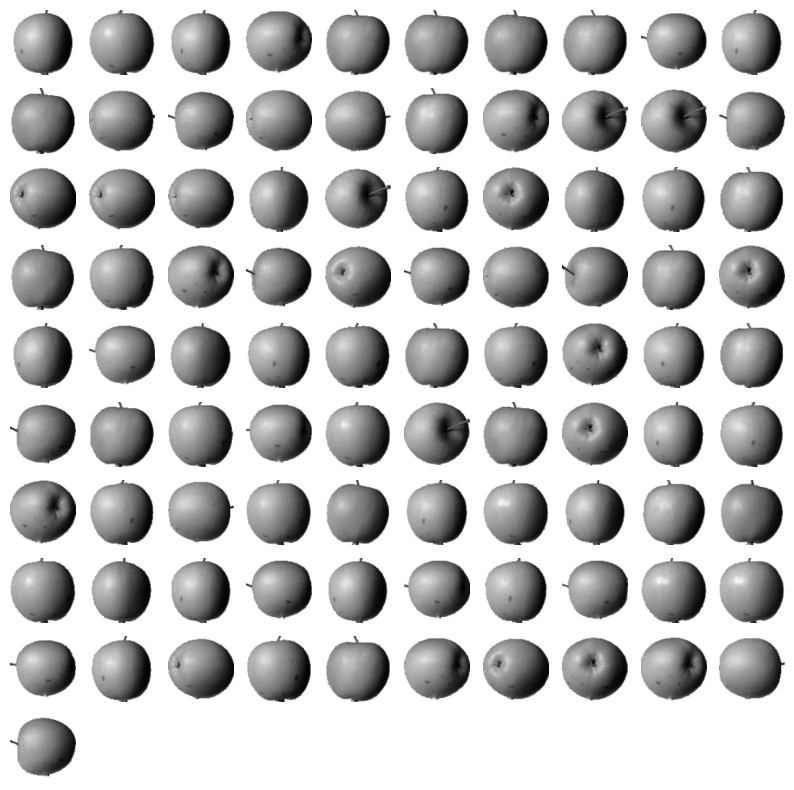

In [10]:
### 원본 이미지 데이터에서 군집 0번에 대한 데이터만 추출하기
# - 변수명: label_0
label_0 = fruits[km.labels_ == 0]
print(label_0.shape)

### 시각화하기: 한개의 그래프에 여러개 그래프 시각화(subplots 사용)
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

### 10행 10열 반복 수행
for i in range(10):
    for j in range(10):
        if(i * 10 + j) < len(label_0):
            axes[i, j].imshow(label_0[i * 10 + j], cmap="gray_r")
        ### x,y축 좌표 제거하기
        axes[i, j].axis("off")
plt.show()

# fig = axes.flatten()

# for i, ax in enumerate(axes):
#     if i < len(label_0):
#         ax.imshow(label_0[i], cmap="gray_r")
#         ax.axis("off")
#     else:
#         ax.axis("off")
# plt.tight_layout()
# plt.show()

### 0번 군집은 "사과"를 분류한 것으로 판단됨
# - 사과 100개 중에 91개만 분류되었기에 사과는 91%의 정확도로 맞쳤음

(98, 100, 100)


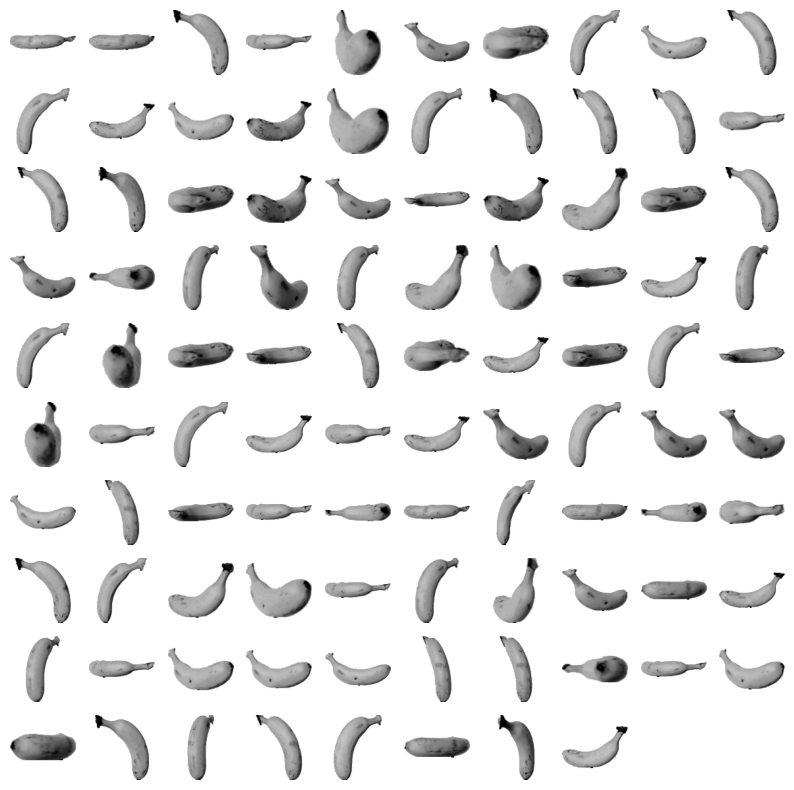

In [11]:
### 원본 이미지 데이터에서 군집 0번에 대한 데이터만 추출하기
# - 변수명: label_1
label_1 = fruits[km.labels_ == 1]
print(label_1.shape)

### 시각화하기: 한개의 그래프에 여러개 그래프 시각화(subplots 사용)
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

### 10행 10열 반복 수행
for i in range(10):
    for j in range(10):
        if(i * 10 + j) < len(label_1):
            axes[i, j].imshow(label_1[i * 10 + j], cmap="gray_r")
        ### x,y축 좌표 제거하기
        axes[i, j].axis("off")
plt.show()

# fig = axes.flatten()

# for i, ax in enumerate(axes):
#     if i < len(label_1):
#         ax.imshow(label_1[i], cmap="gray_r")
#         ax.axis("off")
#     else:
#         ax.axis("off")
# plt.tight_layout()
# plt.show()

### 1번 군집은 "바나나"를 분류한 것으로 판단됨
# - 바나나 100개 중에 98개만 분류되었기에 바나나는 98%의 정확도로 맞쳤음

(111, 100, 100)


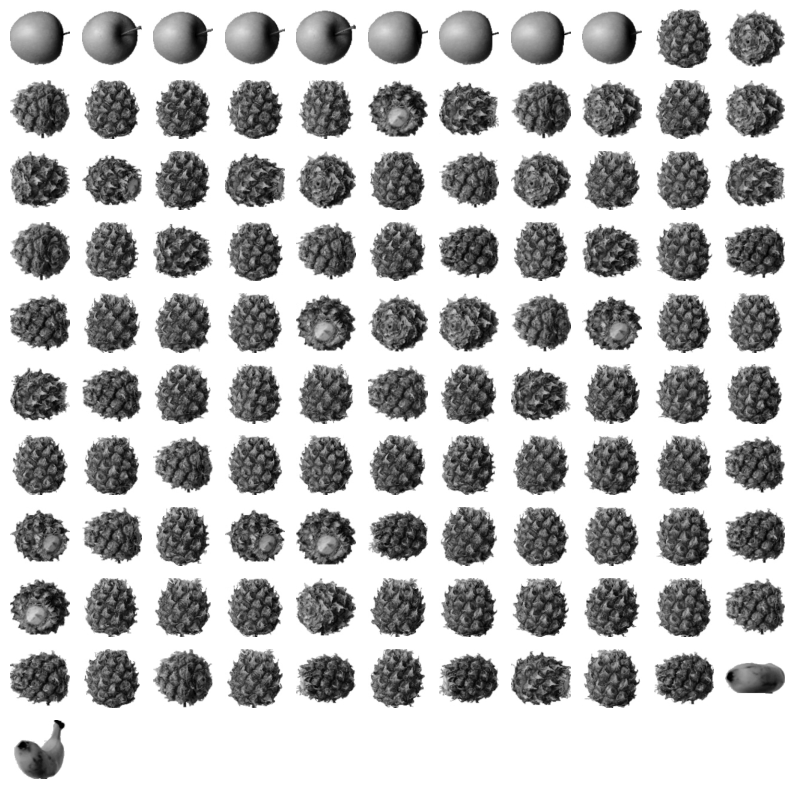

In [12]:
### 원본 이미지 데이터에서 군집 0번에 대한 데이터만 추출하기
# - 변수명: label_2
label_2 = fruits[km.labels_ == 2]
print(label_2.shape)

### 시각화하기: 한개의 그래프에 여러개 그래프 시각화(subplots 사용)
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(10, 10))

### 10행 10열 반복 수행
for i in range(11):
    for j in range(11):
        if(i * 11 + j) < len(label_2):
            axes[i, j].imshow(label_2[i * 11 + j], cmap="gray_r")
        ### x,y축 좌표 제거하기
        axes[i, j].axis("off")
plt.show()

# fig = axes.flatten()

# for i, ax in enumerate(axes):
#     if i < len(label_2):
#         ax.imshow(label_2[i], cmap="gray_r")
#         ax.axis("off")
#     else:
#         ax.axis("off")
# plt.tight_layout()
# plt.show()

### 2번 군집은 "파인애플"를 분류한 것으로 판단됨
# - 파인애플 100개 중에 100개 모두 맞췄으나 
# - 다른 과일, 사과 9개 와 바나나 2개를 포함하고 있음

### 군집분석 평가하기

In [13]:
s_s = silhouette_score(fruits_2d, km.labels_)
s_s

0.2424386970519635

### 임의 이미지 데이터로 예측하기

In [14]:
### 원본 데이터 중에 100번째 데이터로 예측해 주세요.
# 출력결과: "예측결과(예측된 군집번호) : (실제 과일이름)가 예측되었습니다."
# 실제 이미지도 시각화
test_data : fruits[99:100]
print(test_data)

test_pred = km.predict(test_data.reshape(-1, 100*100))
print(test_pred)

label_dict = { 0:"사과", 1:"바나나", 2:"파인애플"}
print(f"예측결과({test_pred[0]}) : ({label_dict[test_pred[0]]})가 예측되었습니다.")

# 예측된 이미지 출력
plt.imshow(test_data[0], cmap="gray_r")
plt.show()

NameError: name 'test_data' is not defined

### 이미지 파일을 -> 이미지 데이터로 변환하는 방법

##### 사용 라이브러리

In [ ]:
### 이미지 파일을 -> 데이터로 변환

### 데이터를 이미지로 변환

### 이미지 파일 읽어들이기

################################## 딥러닝에서 keras 라이브러리 설치 후 진행...